<a href="https://colab.research.google.com/github/eracoding/Tensorflow_2_0/blob/main/Linear_Regression_Tensorflow2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing dataset


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

tf.__version__

'2.11.0'

In [ ]:
boston_load = datasets.load_boston()
feature_columns = boston_load.feature_names
target_columns = boston_load.target

In [ ]:
boston_data = pd.DataFrame(boston_load.data, columns=feature_columns).astype(np.float32)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33


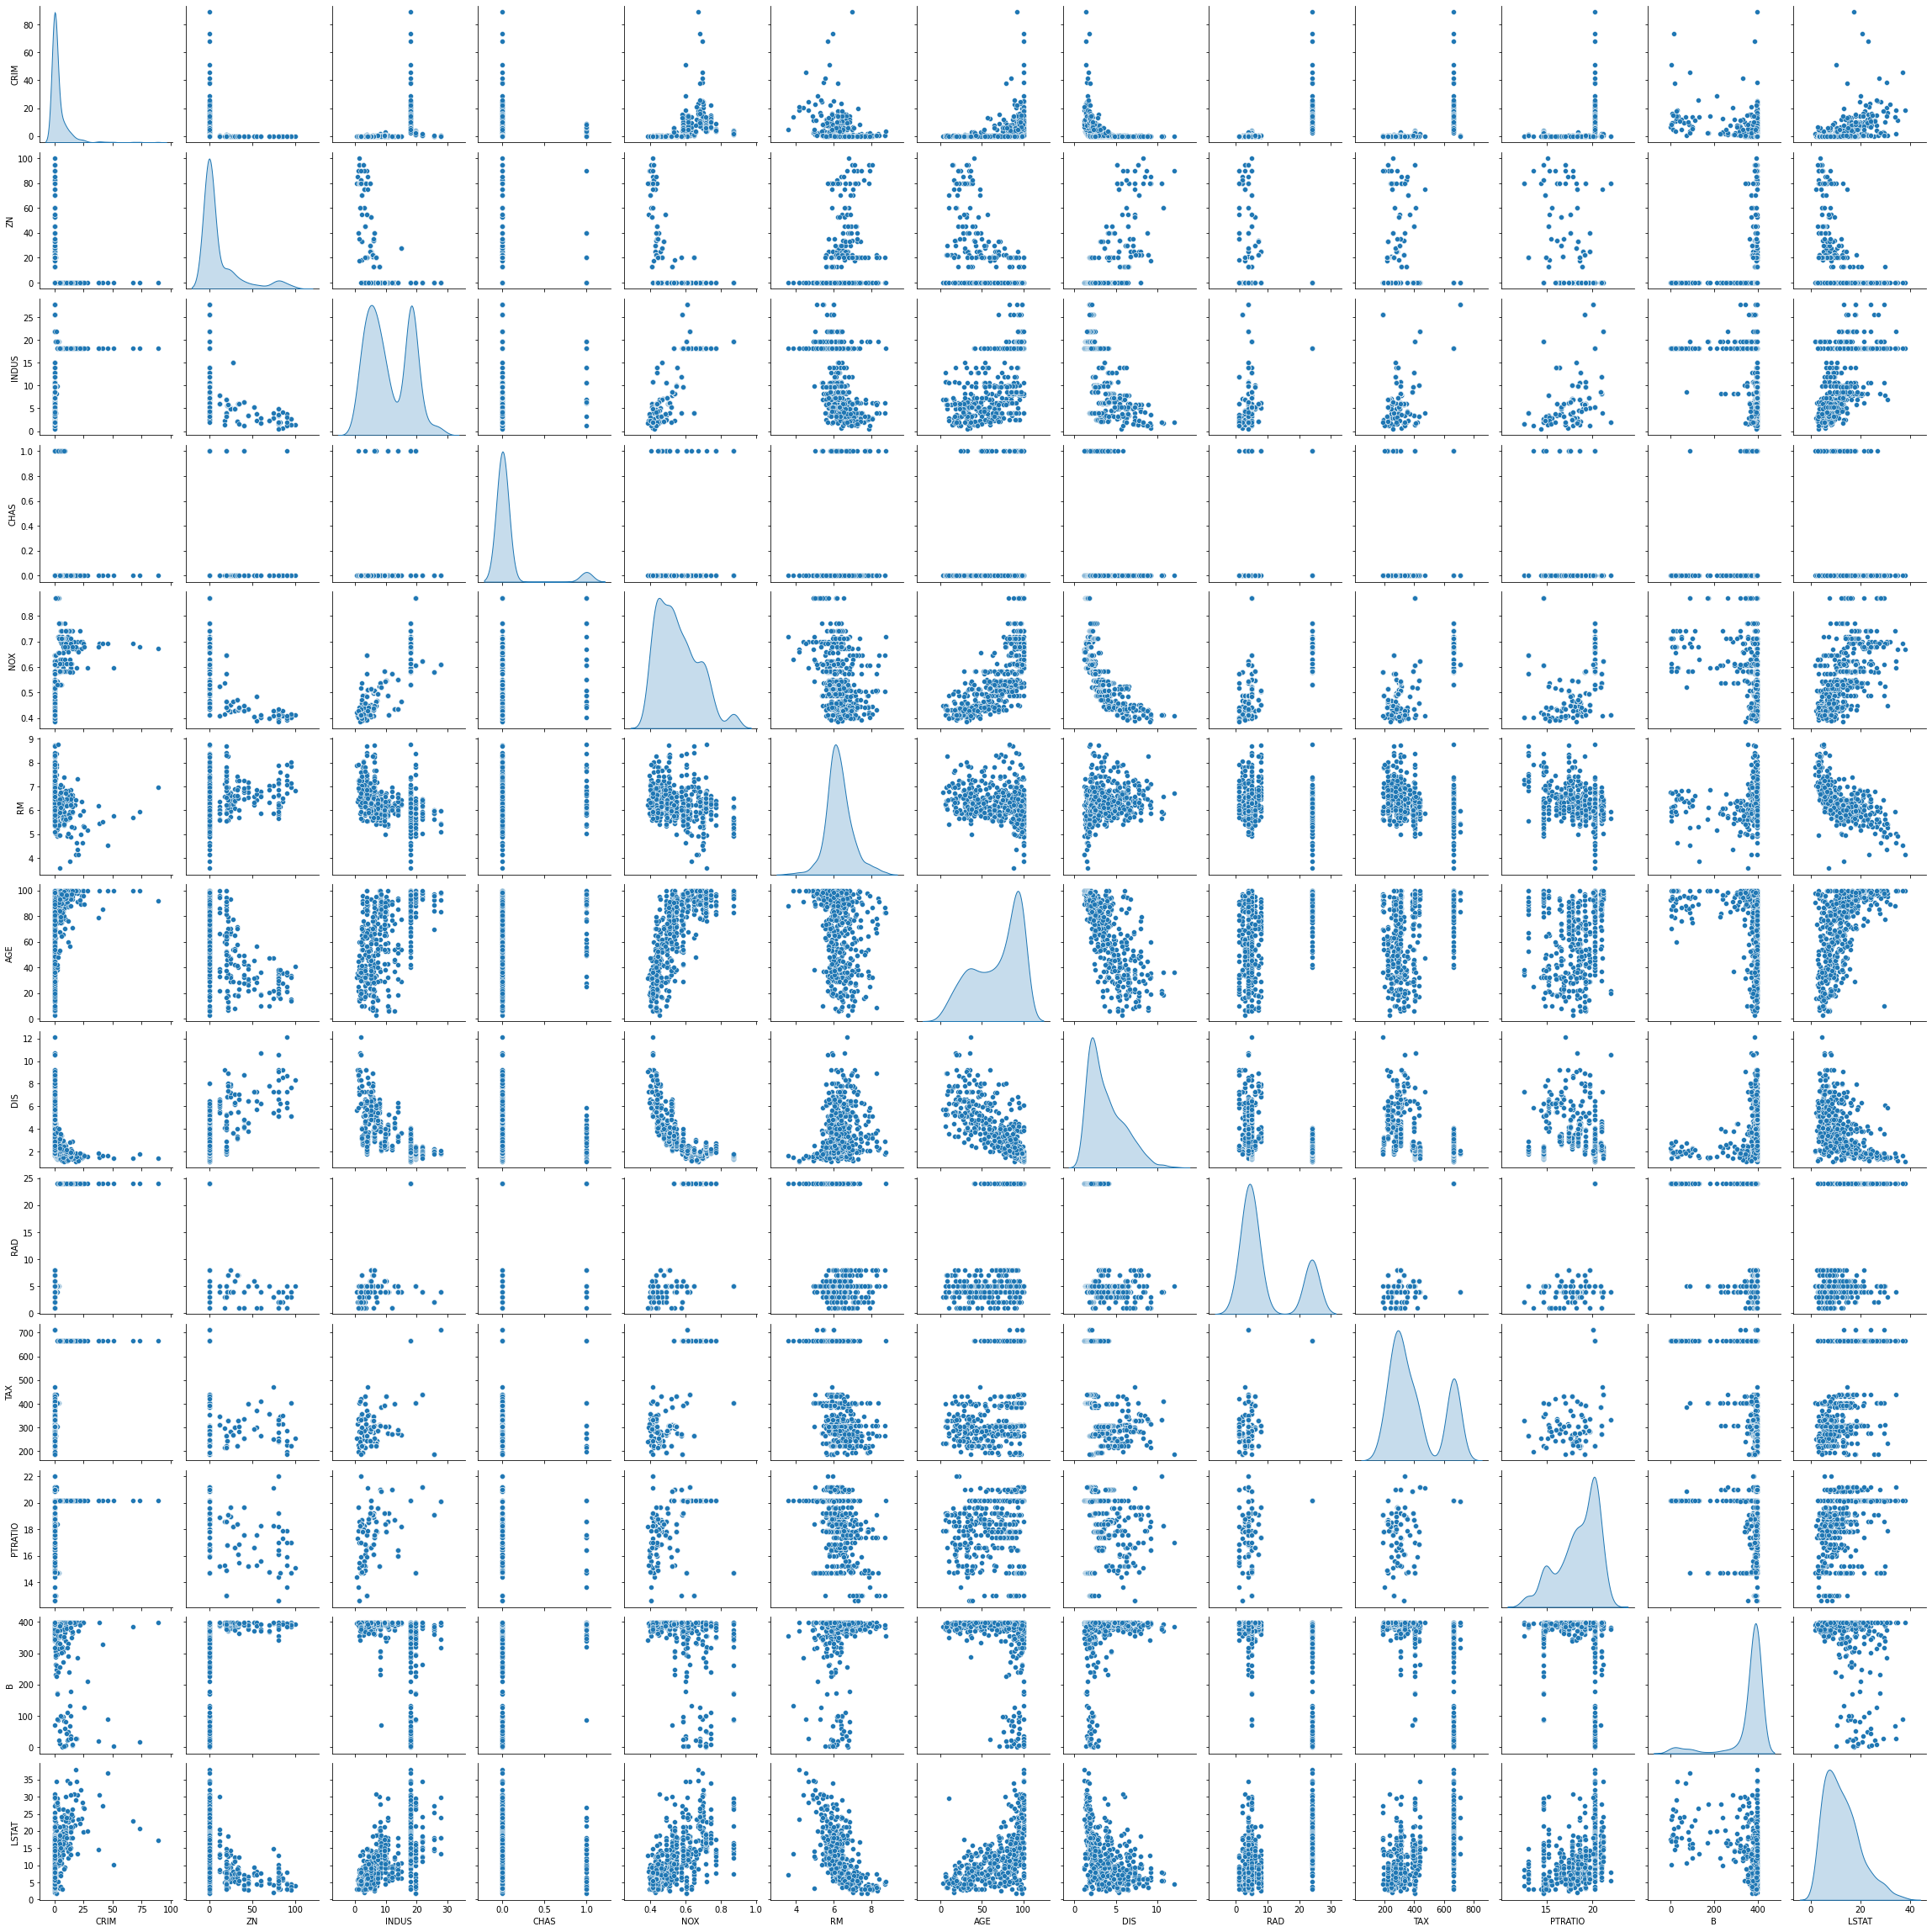

In [ ]:
sb.pairplot(boston_data, diag_kind='kde')

In [ ]:
correlation_data = boston_data.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
stats = boston_data.describe()
boston_stats = stats.transpose()
boston_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136780,6.860353,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574898,28.148861,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537109,187.00000,279.000000,330.000000,666.000000,711.000000


In [ ]:
X_data = boston_data[[i for i in boston_data.columns if i not in ['LSTAT']]]
Y_data = boston_data[['LSTAT']]

In [ ]:
training_features, test_features, training_labels, test_labels = train_test_split(X_data, Y_data, test_size=0.2)
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])
print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  404
No. of rows in Test Features:  102
No. of columns in Training Features:  12
No. of columns in Test Features:  12
No. of rows in Training Label:  404
No. of rows in Test Label:  102
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [ ]:
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x-stats['mean'])/stats['std']

In [ ]:
normed_train_features = norm(training_features)
normed_train_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
241,-0.418302,0.790057,-0.908381,-0.267284,-1.091131,-0.251124,-0.134702,1.199968,-0.416135,-0.671865,-0.840709,0.398393
203,-0.427077,3.560741,-1.238258,-0.267284,-1.191031,2.202023,-1.267998,0.630207,-0.644867,-1.125028,-1.711128,0.377296
316,-0.392090,-0.488721,-0.179719,-0.267284,-0.117319,-0.503694,0.508328,0.106613,-0.644867,-0.648014,-0.016102,0.353448
458,0.526386,-0.488721,1.022498,-0.267284,1.301424,0.036333,0.526091,-0.461932,1.642458,1.510478,0.808506,-1.005107
340,-0.423814,-0.488721,-0.870262,-0.267284,-0.360772,-0.428342,-0.369177,0.487171,-0.530501,-1.125028,0.808506,0.424534
...,...,...,...,...,...,...,...,...,...,...,...,...
339,-0.424622,-0.488721,-0.870262,-0.267284,-0.360772,-0.404619,-0.834575,0.487171,-0.530501,-1.125028,0.808506,0.424534
190,-0.420210,1.429445,-1.126832,-0.267284,-1.015576,0.943355,-1.683659,1.267183,-0.530501,-0.087522,-1.482070,0.204166
318,-0.381743,-0.488721,-0.179719,-0.267284,-0.117319,0.149362,-0.060096,-0.111403,-0.644867,-0.648014,-0.016102,0.405157
259,-0.350283,0.363797,-1.049128,-0.267284,0.747359,0.791254,1.105174,-0.823218,-0.530501,-0.886521,-2.489924,0.367550


In [ ]:
normed_test_features = norm(test_features)
normed_test_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
179,-0.388106,-0.479072,-1.237048,-0.290296,-0.528971,1.017084,-0.315704,-0.536626,-0.720951,-1.152609,-0.350431,0.501662
428,0.314424,-0.479072,0.981645,-0.290296,1.352337,-0.201141,0.381489,-0.987813,1.722526,1.605763,0.791856,-2.345081
387,1.778243,-0.479072,0.981645,-0.290296,1.559182,-2.047827,0.784940,-1.198509,1.722526,1.605763,0.791856,0.501662
226,-0.356932,-0.479072,-0.706491,-0.290296,-0.371375,2.657895,0.678769,-0.341334,-0.139171,-0.487801,-0.540811,0.411376
335,-0.389854,-0.479072,-0.849770,-0.290296,-0.263028,-0.442618,-1.161536,1.057377,-0.488239,-0.971828,0.791856,0.501662
...,...,...,...,...,...,...,...,...,...,...,...,...
338,-0.390483,-0.479072,-0.849770,-0.290296,-0.263028,-0.408564,-1.062443,0.464935,-0.488239,-0.971828,0.791856,0.494454
250,-0.380176,0.482500,-0.754724,-0.290296,-1.090409,0.253952,-1.922432,1.770167,-0.255527,-0.353673,0.268308,0.495782
288,-0.389249,1.815587,-0.831328,-0.290296,-1.346503,-0.012293,-0.768702,1.730017,-0.371883,-0.569444,-0.921573,0.501662
399,0.559461,-0.479072,0.981645,-0.290296,1.490234,-0.728986,0.370872,-1.207599,1.722526,1.605763,0.791856,-0.055415


In [ ]:
def feed_input(features_dataframe, target_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

In [ ]:
train_feed_input = feed_input(normed_train_features, training_labels)

In [ ]:
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)

In [ ]:
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

In [ ]:
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]

In [ ]:
linear_model = LinearRegressor(feature_columns=feature_columns_numeric, optimizer='RMSProp')

In [ ]:
linear_model.train(train_feed_input)

In [ ]:
train_predictions = linear_model.predict(train_feed_input_testing)

In [ ]:
test_predictions = linear_model.predict(test_feed_input)

In [ ]:
train_predictions_series = pd.Series([p['predictions'][0] for p in train_predictions])

In [ ]:
test_predictions_series = pd.Series([p['predictions'][0] for p in test_predictions])

In [ ]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])
training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)
train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)

In [ ]:
def calculate_errors_and_r2(y_true, y_pred):
  mean_squared_err = (mean_squared_error(y_true, y_pred))
  root_mean_squared_err = np.sqrt(mean_squared_err)
  r2 = round(r2_score(y_true, y_pred)*100,0)
  return mean_squared_err, root_mean_squared_err, r2
train_mean_squared_error, train_root_mean_squared_error, train_r2_score_percentage = calculate_errors_and_r2(training_labels, train_predictions_series)
test_mean_squared_error, test_root_mean_squared_error, test_r2_score_percentage = calculate_errors_and_r2(test_labels, test_predictions_series)
print('Training Data Mean Squared Error = ', train_mean_squared_error)
print('Training Data Root Mean Squared Error = ', train_root_mean_squared_error)
print('Training Data R2 = ', train_r2_score_percentage)
print('Test Data Mean Squared Error = ', test_mean_squared_error)
print('Test Data Root Mean Squared Error = ', test_root_mean_squared_error)
print('Test Data R2 = ', test_r2_score_percentage)

Training Data Mean Squared Error =  18.369942
Training Data Root Mean Squared Error =  4.286017
Training Data R2 =  63.0
Test Data Mean Squared Error =  25.658258
Test Data Root Mean Squared Error =  5.065398
Test Data R2 =  55.0
